In [6]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os

class AudioSample:
    def __init__(self, filepath: str, sample_rate: int | None = None):
        self.filepath = filepath
        if sample_rate is None:
            self.y, self.sample_rate = librosa.load(path=self.filepath)
        else:
            self.y, _ = librosa.load(path=self.filepath, sr=sample_rate)
            self.sample_rate = sample_rate

    def to_spectrogram(self) -> np.ndarray:
        # Extract Mel Spectrogram
        mel_spectrogram = librosa.feature.melspectrogram(y=self.y, sr=self.sample_rate)

        # Convert Decibels (Log Scale)
        return librosa.power_to_db(mel_spectrogram, ref=np.max)

/tmp/ipykernel_7258/3285666759.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  self.y, self.sample_rate = librosa.load(path=self.filepath)
/home/nika/music-recommender-system/my_venv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_7258/3285666759.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  self.y, self.sample_rate = librosa.load(path=self.filepath)
/home/nika/music-recommender-system/my_venv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_7258/3285666759.py:10: UserWarning: PySoundFile failed. Trying 

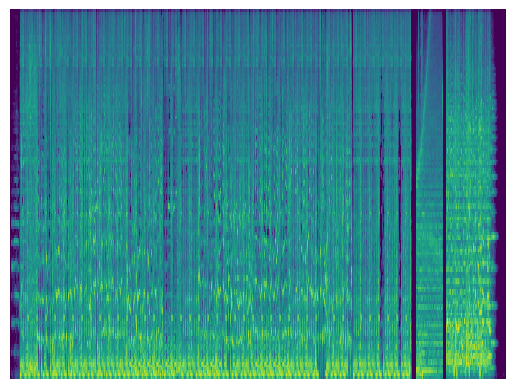

In [10]:
if __name__ == "__main__":
    folder_path = r"/home/nika/music-recommender-system/sample_music/"
    for filename in os.listdir(folder_path):
        sample_path = os.path.join(folder_path, filename)
        if os.path.isfile(sample_path):
            audio_1 = AudioSample(filepath=sample_path)
            spec_1 = audio_1.to_spectrogram()
            librosa.display.specshow(spec_1, cmap='viridis')
            plt.axis('off')
            plt.savefig(f'/home/nika/music-recommender-system/spectrograms/spec_{filename[:-4]}.png')